In [1]:
from prophet import Prophet

In [2]:
import pmdarima as pm
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import TimeSeriesSplit
import pandas as pd
import numpy as np
import datetime
import requests
import warnings

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
from pmdarima import auto_arima

import prophet

warnings.filterwarnings('ignore')

/Users/ChloeSokol/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
mat = np.empty((0, 5))
metrics = pd.DataFrame(mat)
metrics = pd.DataFrame(columns=['country', 'model', 'mae', 'mape', 'rsq'])

# Belgium

## train/test split

In [4]:
belgium = pd.read_csv('univariate_df_Belgium.csv')
belgium['date'] = pd.to_datetime(belgium['date'])
belgium = belgium.drop('Unnamed: 0', axis=1)
belgium = belgium.rename(columns={'date': 'ds', 'new_deaths': 'y'})
train_size = int(len(belgium) * 0.7)
belgium_train, belgium_test = belgium[0:train_size], belgium[train_size:]
print(belgium_train.shape, belgium_test.shape)

(141, 2) (61, 2)


## Baseline Prophet

In [5]:
model_baseline = Prophet()
model_baseline.fit(belgium_train)

17:25:15 - cmdstanpy - INFO - Chain [1] start processing
17:25:15 - cmdstanpy - INFO - Chain [1] done processing


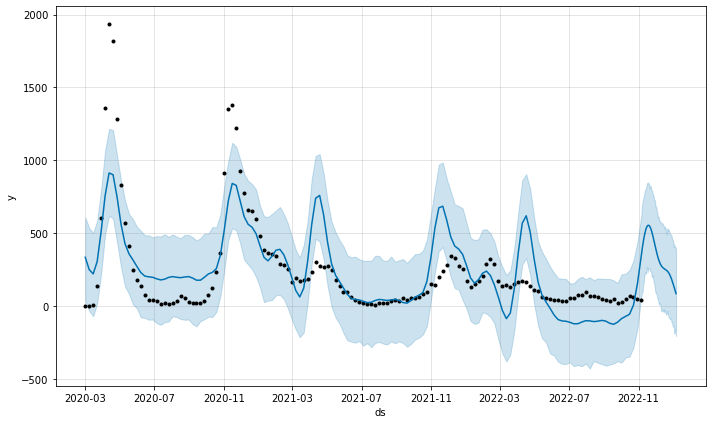

In [6]:
future_baseline = model_baseline.make_future_dataframe(periods=61)
forecast_baseline = model_baseline.predict(future_baseline)
model_baseline.plot(forecast_baseline); 

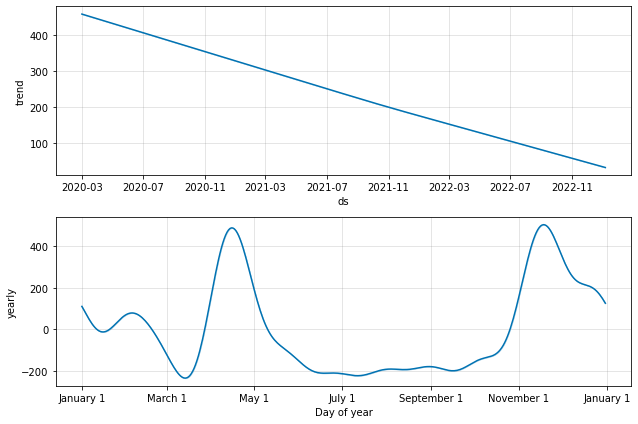

In [7]:
model_baseline.plot_components(forecast_baseline);

In [8]:
performance_baseline = pd.merge(belgium_test, forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-61:], on='ds')
mae = mean_absolute_error(performance_baseline['y'], performance_baseline['yhat'])
mape = mean_absolute_percentage_error(performance_baseline['y'], performance_baseline['yhat'])
r2 = r2_score(performance_baseline['y'], performance_baseline['yhat'])
new_row = {'country': 'Belgium', 'model': 'Baseline Prophet', 'mae': mae, 'mape': mape, 'rsq': r2}
metrics = metrics.append(new_row, ignore_index=True)

## Seasonal Prophet

In [9]:
model_season = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model_season.fit(belgium_train)

17:25:18 - cmdstanpy - INFO - Chain [1] start processing


17:25:18 - cmdstanpy - INFO - Chain [1] done processing


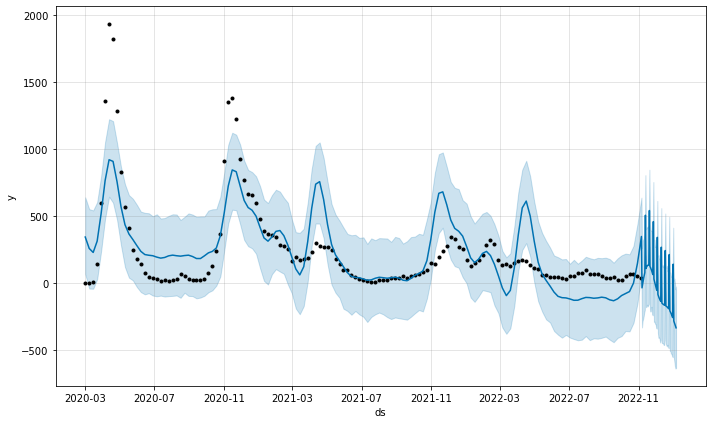

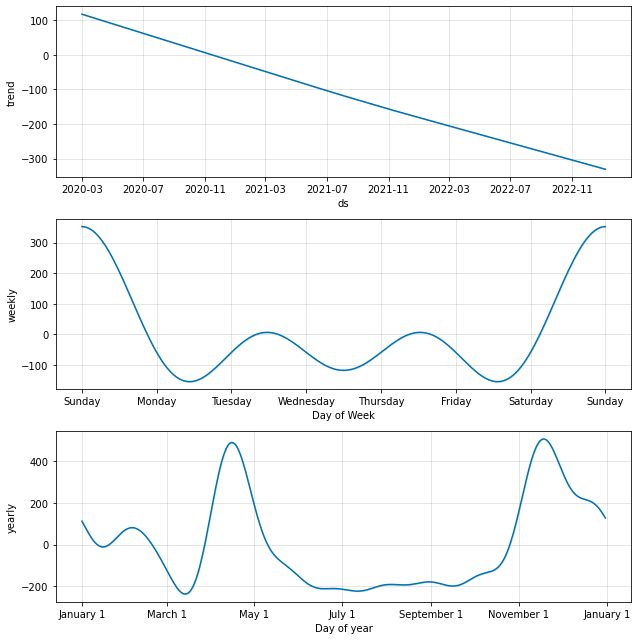

In [10]:
future_season = model_season.make_future_dataframe(periods=61)
forecast_season = model_season.predict(future_season)
model_season.plot(forecast_season); 

model_season.plot_components(forecast_season);

In [11]:
performance_season = pd.merge(belgium_test, forecast_season[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-61:], on='ds')
mae = mean_absolute_error(performance_season['y'], performance_season['yhat'])
mape = mean_absolute_percentage_error(performance_season['y'], performance_season['yhat'])
r2 = r2_score(performance_season['y'], performance_season['yhat'])
new_row = {'country': 'Belgium', 'model': 'Seasonal Prophet', 'mae': mae, 'mape': mape, 'rsq': r2}
metrics = metrics.append(new_row, ignore_index=True)

# Chile

## train/test split

In [12]:
chile = pd.read_csv('univariate_df_Chile.csv')
chile['date'] = pd.to_datetime(chile['date'])
chile = chile.drop('Unnamed: 0', axis=1)
chile = chile.rename(columns={'date': 'ds', 'new_deaths': 'y'})
train_size = int(len(chile) * 0.7)
chile_train, chile_test = chile[0:train_size], chile[train_size:]
print(chile_train.shape, chile_test.shape)

(141, 2) (61, 2)


## Baseline Prophet

17:25:20 - cmdstanpy - INFO - Chain [1] start processing
17:25:21 - cmdstanpy - INFO - Chain [1] done processing


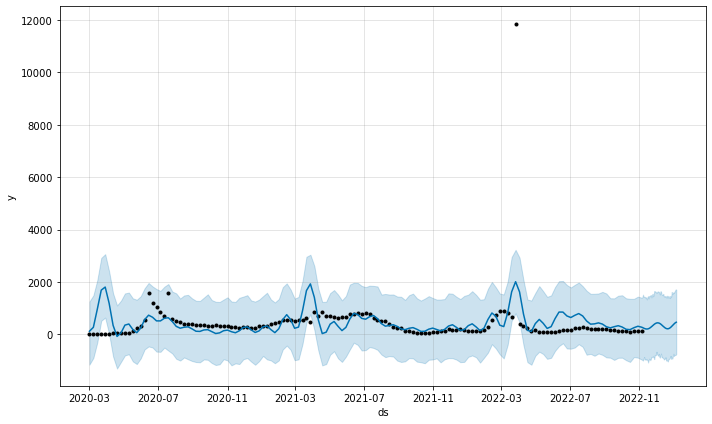

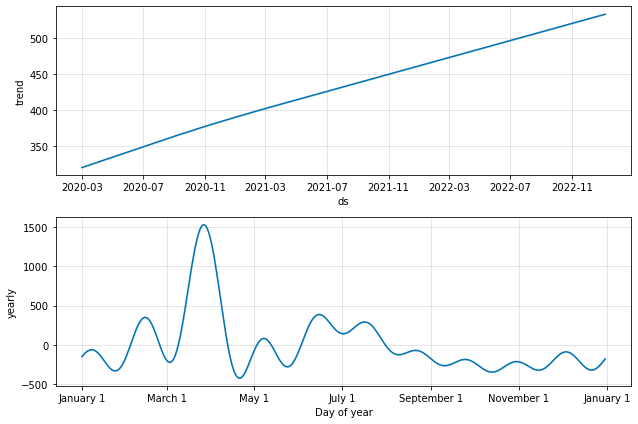

In [13]:
model_baseline = Prophet()
model_baseline.fit(chile_train)
future_baseline = model_baseline.make_future_dataframe(periods=61)
forecast_baseline = model_baseline.predict(future_baseline)
model_baseline.plot(forecast_baseline); 
model_baseline.plot_components(forecast_baseline);

In [14]:
performance_baseline = pd.merge(chile_test, forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-61:], on='ds')
mae = mean_absolute_error(performance_baseline['y'], performance_baseline['yhat'])
mape = mean_absolute_percentage_error(performance_baseline['y'], performance_baseline['yhat'])
r2 = r2_score(performance_baseline['y'], performance_baseline['yhat'])
new_row = {'country': 'Chile', 'model': 'Baseline Prophet', 'mae': mae, 'mape': mape, 'rsq': r2}
metrics = metrics.append(new_row, ignore_index=True)

## Seasonal Prophet

17:25:22 - cmdstanpy - INFO - Chain [1] start processing
17:25:22 - cmdstanpy - INFO - Chain [1] done processing


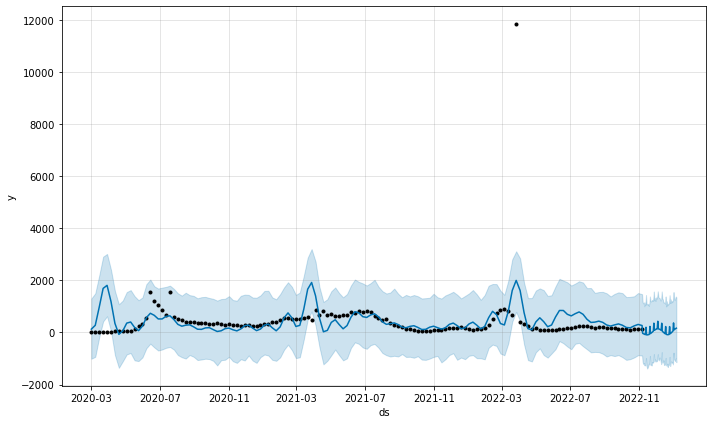

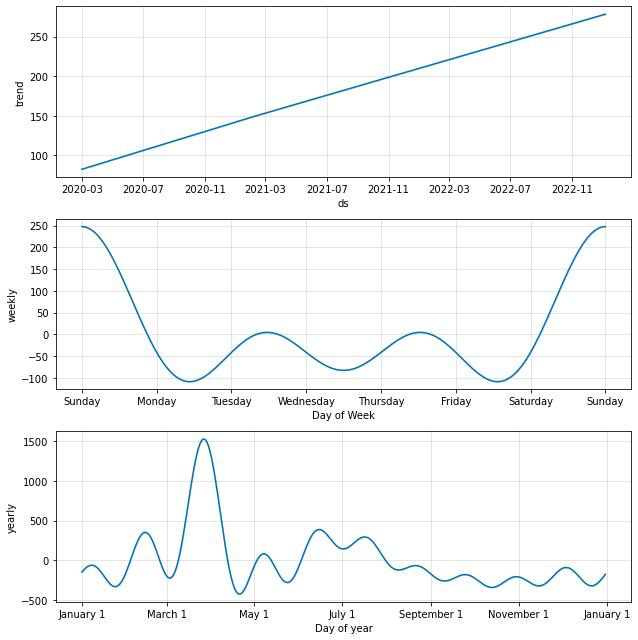

In [15]:
model_season = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model_season.fit(chile_train)
future_season = model_season.make_future_dataframe(periods=61)
forecast_season = model_season.predict(future_season)
model_season.plot(forecast_season); 

model_season.plot_components(forecast_season);

In [16]:
performance_season = pd.merge(chile_test, forecast_season[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-61:], on='ds')
mae = mean_absolute_error(performance_season['y'], performance_season['yhat'])
mape = mean_absolute_percentage_error(performance_season['y'], performance_season['yhat'])
r2 = r2_score(performance_season['y'], performance_season['yhat'])
new_row = {'country': 'Chile', 'model': 'Seasonal Prophet', 'mae': mae, 'mape': mape, 'rsq': r2}
metrics = metrics.append(new_row, ignore_index=True)

# Ireland

## train/test split

In [17]:
ireland = pd.read_csv('univariate_df_Ireland.csv')
ireland['date'] = pd.to_datetime(ireland['date'])
ireland = ireland.drop('Unnamed: 0', axis=1)
ireland = ireland.rename(columns={'date': 'ds', 'new_deaths': 'y'})
train_size = int(len(ireland) * 0.7)
ireland_train, ireland_test = ireland[0:train_size], ireland[train_size:]
print(ireland_train.shape, ireland_test.shape)

(141, 2) (61, 2)


## Baseline Prophet

17:25:25 - cmdstanpy - INFO - Chain [1] start processing
17:25:25 - cmdstanpy - INFO - Chain [1] done processing


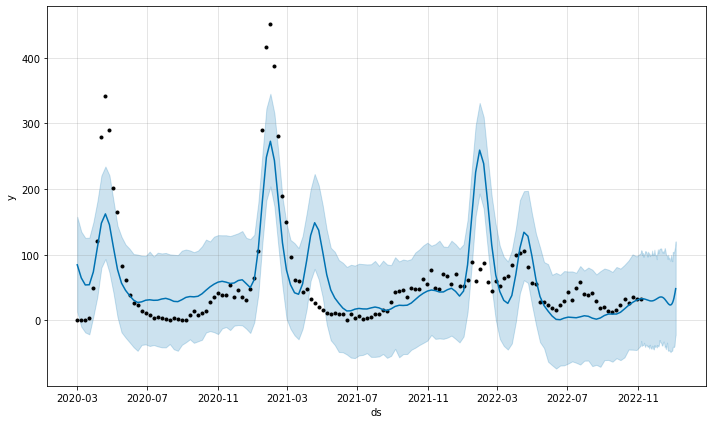

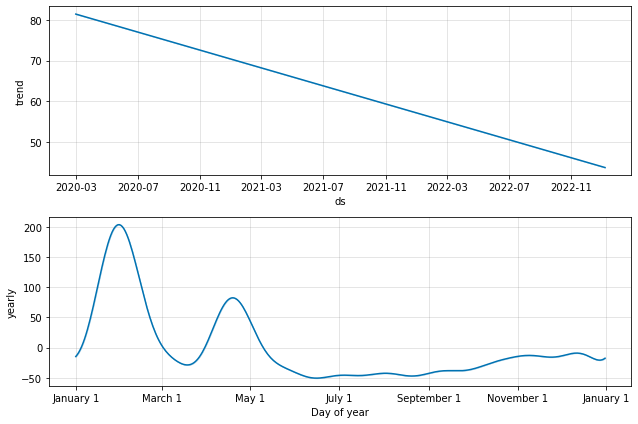

In [18]:
model_baseline = Prophet()
model_baseline.fit(ireland_train)
future_baseline = model_baseline.make_future_dataframe(periods=61)
forecast_baseline = model_baseline.predict(future_baseline)
model_baseline.plot(forecast_baseline); 
model_baseline.plot_components(forecast_baseline);

In [19]:
performance_baseline = pd.merge(ireland_test, forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-61:], on='ds')
mae = mean_absolute_error(performance_baseline['y'], performance_baseline['yhat'])
mape = mean_absolute_percentage_error(performance_baseline['y'], performance_baseline['yhat'])
r2 = r2_score(performance_baseline['y'], performance_baseline['yhat'])
new_row = {'country': 'Ireland', 'model': 'Baseline Prophet', 'mae': mae, 'mape': mape, 'rsq': r2}
metrics = metrics.append(new_row, ignore_index=True)

## Seasonal Prophet

17:25:27 - cmdstanpy - INFO - Chain [1] start processing
17:25:27 - cmdstanpy - INFO - Chain [1] done processing


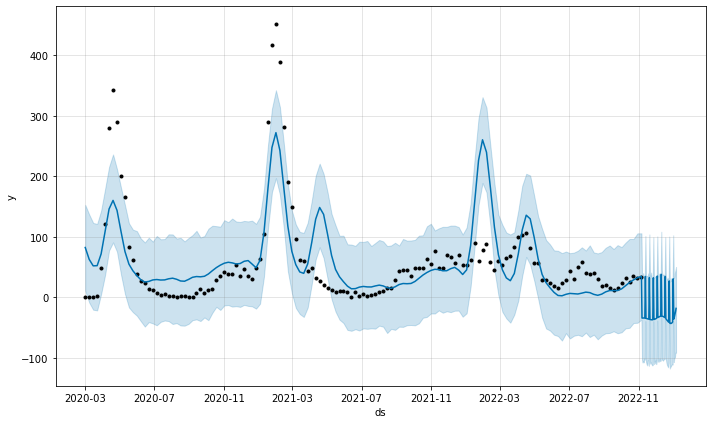

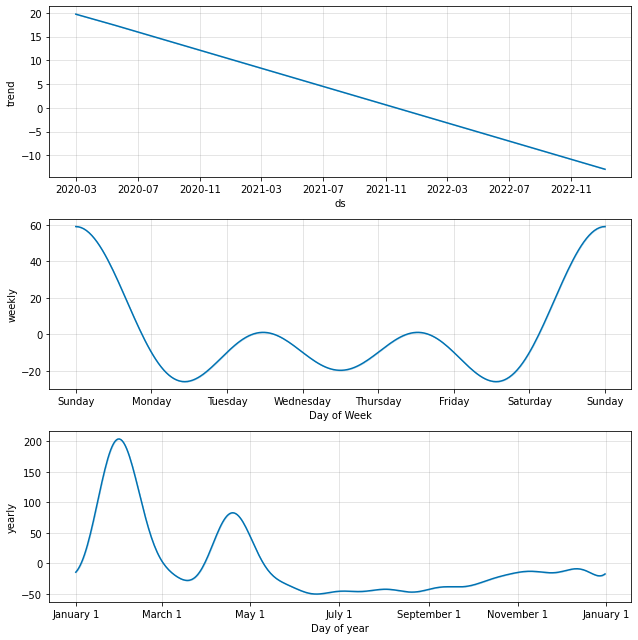

In [20]:
model_season = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model_season.fit(ireland_train)
future_season = model_season.make_future_dataframe(periods=61)
forecast_season = model_season.predict(future_season)
model_season.plot(forecast_season); 

model_season.plot_components(forecast_season);

In [21]:
performance_season = pd.merge(ireland_test, forecast_season[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-61:], on='ds')
mae = mean_absolute_error(performance_season['y'], performance_season['yhat'])
mape = mean_absolute_percentage_error(performance_season['y'], performance_season['yhat'])
r2 = r2_score(performance_season['y'], performance_season['yhat'])
new_row = {'country': 'Ireland', 'model': 'Seasonal Prophet', 'mae': mae, 'mape': mape, 'rsq': r2}
metrics = metrics.append(new_row, ignore_index=True)

# Israel

## train/test split

In [22]:
israel = pd.read_csv('univariate_df_Israel.csv')
israel['date'] = pd.to_datetime(israel['date'])
israel = israel.drop('Unnamed: 0', axis=1)
israel = israel.rename(columns={'date': 'ds', 'new_deaths': 'y'})
train_size = int(len(israel) * 0.7)
israel_train, israel_test = israel[0:train_size], israel[train_size:]
print(israel_train.shape, israel_test.shape)

(141, 2) (61, 2)


## Baseline Prophet

17:25:29 - cmdstanpy - INFO - Chain [1] start processing
17:25:30 - cmdstanpy - INFO - Chain [1] done processing


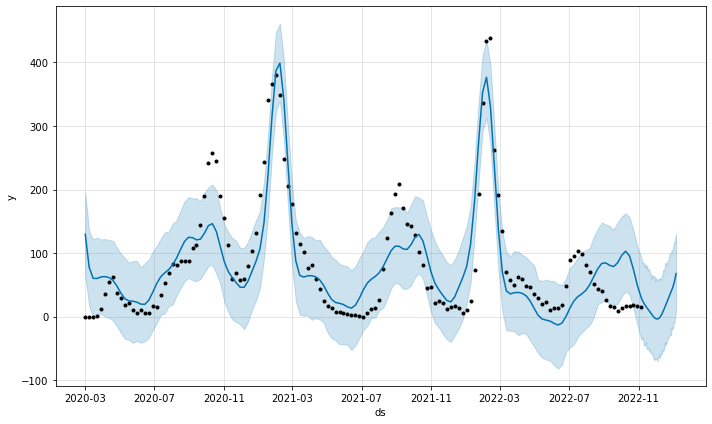

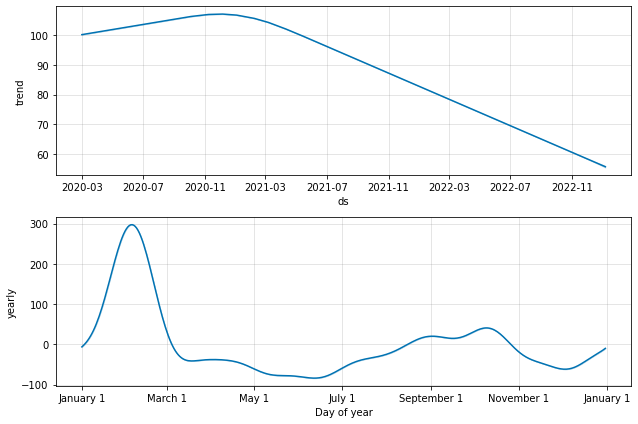

In [23]:
model_baseline = Prophet()
model_baseline.fit(israel_train)
future_baseline = model_baseline.make_future_dataframe(periods=61)
forecast_baseline = model_baseline.predict(future_baseline)
model_baseline.plot(forecast_baseline); 
model_baseline.plot_components(forecast_baseline);

In [24]:
performance_baseline = pd.merge(israel_test, forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-61:], on='ds')
mae = mean_absolute_error(performance_baseline['y'], performance_baseline['yhat'])
mape = mean_absolute_percentage_error(performance_baseline['y'], performance_baseline['yhat'])
r2 = r2_score(performance_baseline['y'], performance_baseline['yhat'])
new_row = {'country': 'Israel', 'model': 'Baseline Prophet', 'mae': mae, 'mape': mape, 'rsq': r2}
metrics = metrics.append(new_row, ignore_index=True)

## Seasonal Prophet

17:25:33 - cmdstanpy - INFO - Chain [1] start processing
17:25:33 - cmdstanpy - INFO - Chain [1] done processing


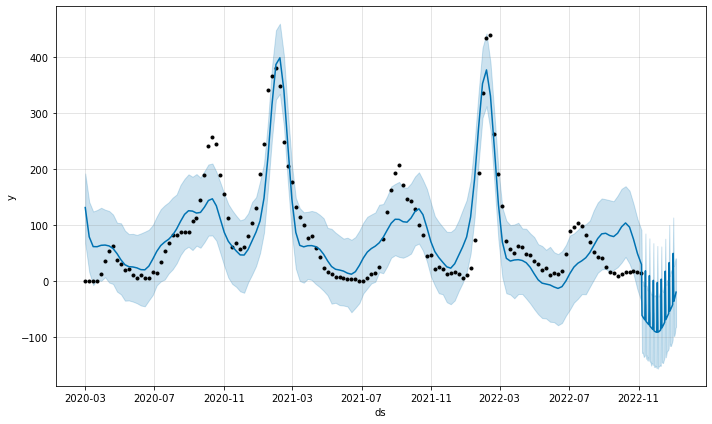

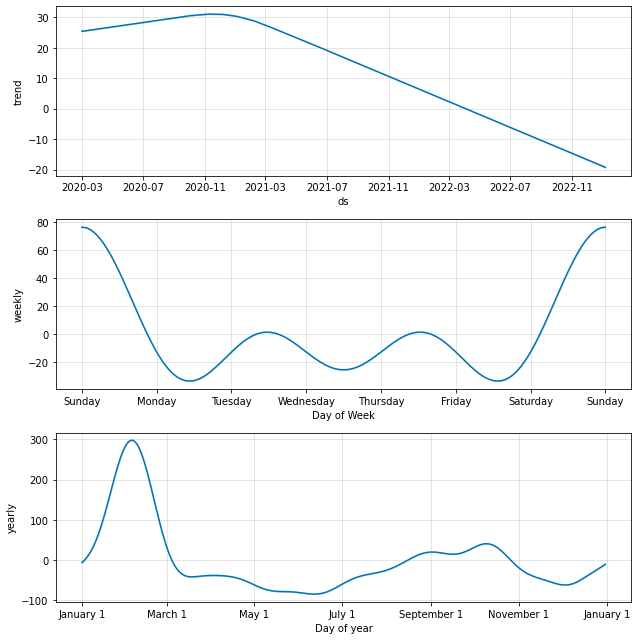

In [25]:
model_season = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model_season.fit(israel_train)
future_season = model_season.make_future_dataframe(periods=61)
forecast_season = model_season.predict(future_season)
model_season.plot(forecast_season); 

model_season.plot_components(forecast_season);

In [26]:
performance_season = pd.merge(israel_test, forecast_season[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-61:], on='ds')
mae = mean_absolute_error(performance_season['y'], performance_season['yhat'])
mape = mean_absolute_percentage_error(performance_season['y'], performance_season['yhat'])
r2 = r2_score(performance_season['y'], performance_season['yhat'])
new_row = {'country': 'Israel', 'model': 'Seasonal Prophet', 'mae': mae, 'mape': mape, 'rsq': r2}
metrics = metrics.append(new_row, ignore_index=True)

# Italy

## train/test split

In [27]:
italy = pd.read_csv('univariate_df_Italy.csv')
italy['date'] = pd.to_datetime(italy['date'])
italy = italy.drop('Unnamed: 0', axis=1)
italy = italy.rename(columns={'date': 'ds', 'new_deaths': 'y'})
train_size = int(len(italy) * 0.7)
italy_train, italy_test = italy[0:train_size], italy[train_size:]
print(italy_train.shape, italy_test.shape)

(141, 2) (61, 2)


## Baseline Prophet

17:25:36 - cmdstanpy - INFO - Chain [1] start processing
17:25:36 - cmdstanpy - INFO - Chain [1] done processing


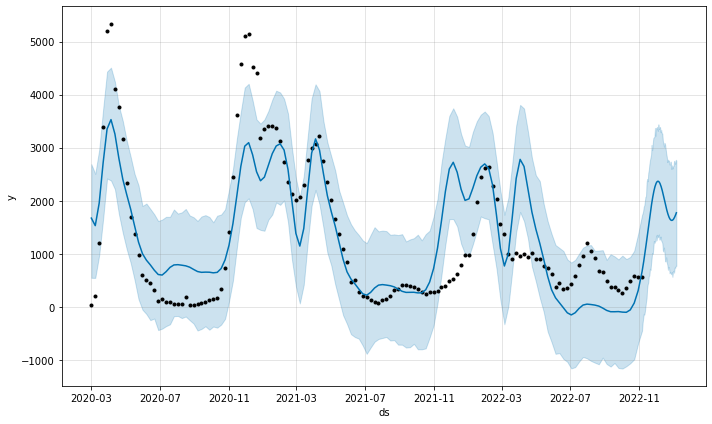

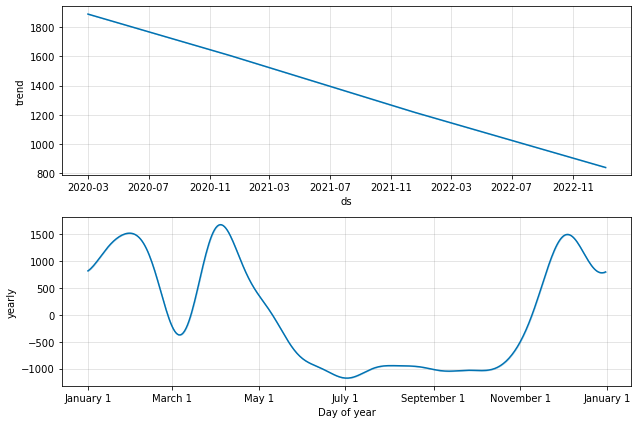

In [28]:
model_baseline = Prophet()
model_baseline.fit(italy_train)
future_baseline = model_baseline.make_future_dataframe(periods=61)
forecast_baseline = model_baseline.predict(future_baseline)
model_baseline.plot(forecast_baseline); 
model_baseline.plot_components(forecast_baseline);

In [29]:
performance_baseline = pd.merge(italy_test, forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-61:], on='ds')
mae = mean_absolute_error(performance_baseline['y'], performance_baseline['yhat'])
mape = mean_absolute_percentage_error(performance_baseline['y'], performance_baseline['yhat'])
r2 = r2_score(performance_baseline['y'], performance_baseline['yhat'])
new_row = {'country': 'Italy', 'model': 'Baseline Prophet', 'mae': mae, 'mape': mape, 'rsq': r2}
metrics = metrics.append(new_row, ignore_index=True)

## Seasonal Prophet

17:25:38 - cmdstanpy - INFO - Chain [1] start processing
17:25:38 - cmdstanpy - INFO - Chain [1] done processing


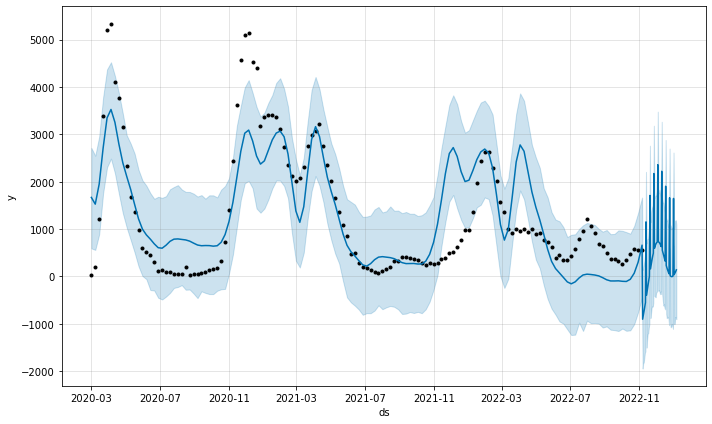

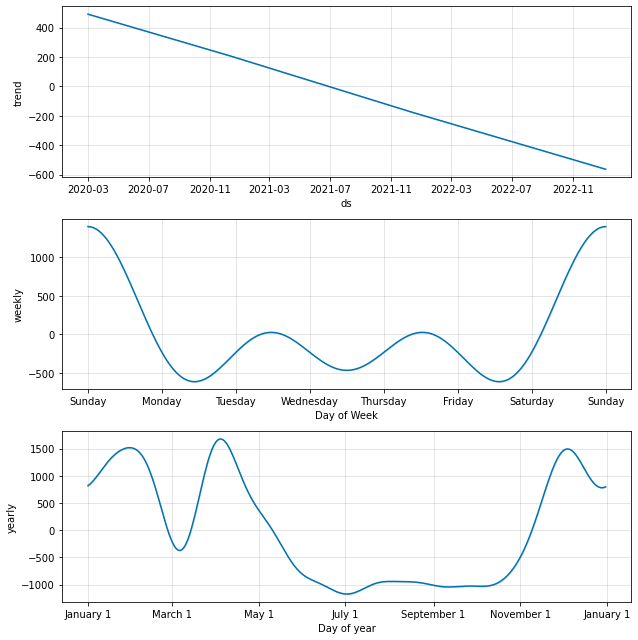

In [30]:
model_season = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model_season.fit(italy_train)
future_season = model_season.make_future_dataframe(periods=61)
forecast_season = model_season.predict(future_season)
model_season.plot(forecast_season); 

model_season.plot_components(forecast_season);

In [31]:
performance_season = pd.merge(italy_test, forecast_season[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-61:], on='ds')
mae = mean_absolute_error(performance_season['y'], performance_season['yhat'])
mape = mean_absolute_percentage_error(performance_season['y'], performance_season['yhat'])
r2 = r2_score(performance_season['y'], performance_season['yhat'])
new_row = {'country': 'Italy', 'model': 'Seasonal Prophet', 'mae': mae, 'mape': mape, 'rsq': r2}
metrics = metrics.append(new_row, ignore_index=True)

# United States

## train/test split

In [32]:
us = pd.read_csv('univariate_df_United_States.csv')
us['date'] = pd.to_datetime(us['date'])
us = us.drop('Unnamed: 0', axis=1)
us = us.rename(columns={'date': 'ds', 'new_deaths': 'y'})
train_size = int(len(us) * 0.7)
us_train, us_test = us[0:train_size], us[train_size:]
print(us_train.shape, us_test.shape)

(141, 3) (61, 3)


## Baseline Prophet

17:25:42 - cmdstanpy - INFO - Chain [1] start processing
17:25:42 - cmdstanpy - INFO - Chain [1] done processing


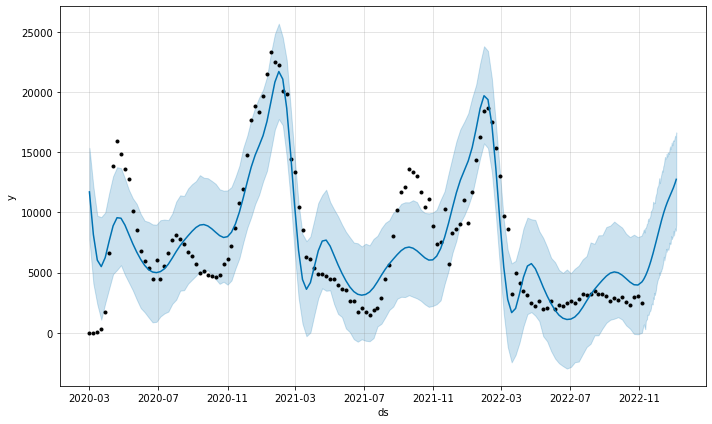

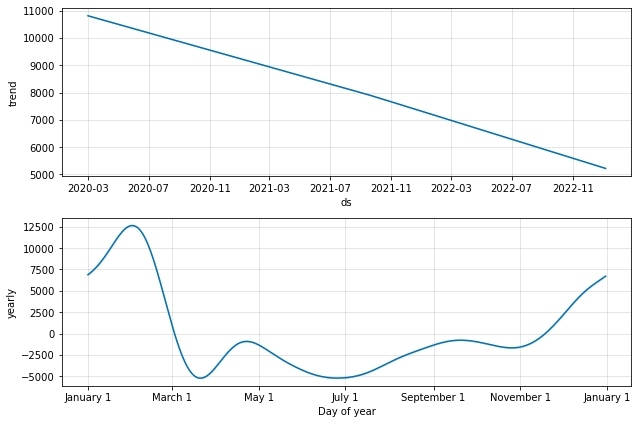

In [33]:
model_baseline = Prophet()
model_baseline.fit(us_train)
future_baseline = model_baseline.make_future_dataframe(periods=61)
forecast_baseline = model_baseline.predict(future_baseline)
model_baseline.plot(forecast_baseline); 
model_baseline.plot_components(forecast_baseline);

In [34]:
performance_baseline = pd.merge(us_test, forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-61:], on='ds')
mae = mean_absolute_error(performance_baseline['y'], performance_baseline['yhat'])
mape = mean_absolute_percentage_error(performance_baseline['y'], performance_baseline['yhat'])
r2 = r2_score(performance_baseline['y'], performance_baseline['yhat'])
new_row = {'country': 'US', 'model': 'Baseline Prophet', 'mae': mae, 'mape': mape, 'rsq': r2}
metrics = metrics.append(new_row, ignore_index=True)

## Seasonal Prophet

17:25:45 - cmdstanpy - INFO - Chain [1] start processing


17:25:45 - cmdstanpy - INFO - Chain [1] done processing


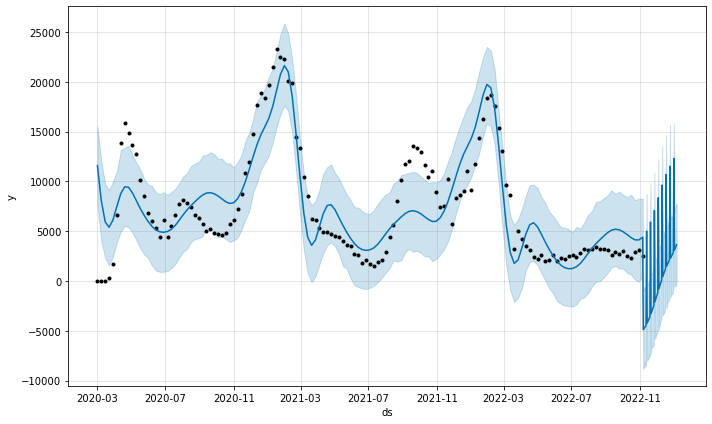

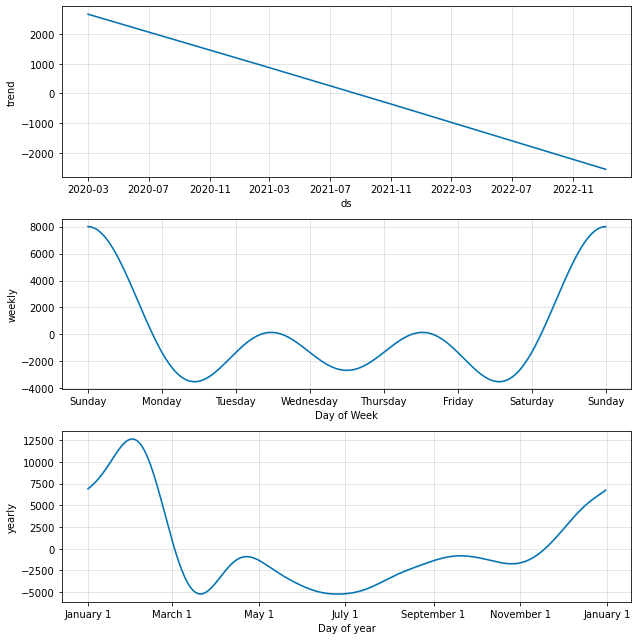

In [35]:
model_season = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model_season.fit(us_train)
future_season = model_season.make_future_dataframe(periods=61)
forecast_season = model_season.predict(future_season)
model_season.plot(forecast_season); 

model_season.plot_components(forecast_season);

In [36]:
performance_season = pd.merge(us_test, forecast_season[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-61:], on='ds')
mae = mean_absolute_error(performance_season['y'], performance_season['yhat'])
mape = mean_absolute_percentage_error(performance_season['y'], performance_season['yhat'])
r2 = r2_score(performance_season['y'], performance_season['yhat'])
new_row = {'country': 'US', 'model': 'Seasonal Prophet', 'mae': mae, 'mape': mape, 'rsq': r2}
metrics = metrics.append(new_row, ignore_index=True)

# Czechia

## train/test split

In [37]:
czechia = pd.read_csv('univariate_df_Czechia.csv')
czechia['date'] = pd.to_datetime(czechia['date'])
czechia = czechia.drop('Unnamed: 0', axis=1)
czechia = czechia.rename(columns={'date': 'ds', 'new_deaths': 'y'})
train_size = int(len(czechia) * 0.7)
czechia_train, czechia_test = czechia[0:train_size], czechia[train_size:]
print(czechia_train.shape, czechia_test.shape)

(141, 3) (61, 3)


## Baseline Prophet

17:25:48 - cmdstanpy - INFO - Chain [1] start processing
17:25:48 - cmdstanpy - INFO - Chain [1] done processing


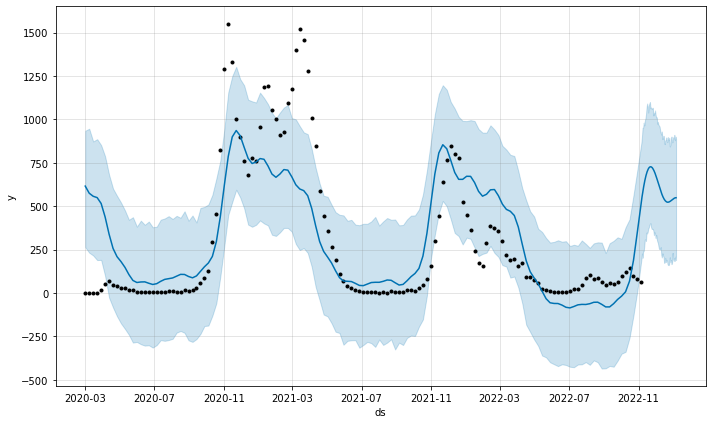

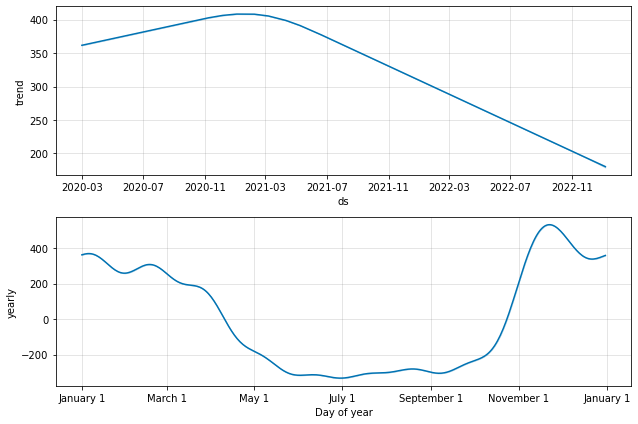

In [38]:
model_baseline = Prophet()
model_baseline.fit(czechia_train)
future_baseline = model_baseline.make_future_dataframe(periods=61)
forecast_baseline = model_baseline.predict(future_baseline)
model_baseline.plot(forecast_baseline); 
model_baseline.plot_components(forecast_baseline);

In [39]:
performance_baseline = pd.merge(czechia_test, forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-61:], on='ds')
mae = mean_absolute_error(performance_baseline['y'], performance_baseline['yhat'])
mape = mean_absolute_percentage_error(performance_baseline['y'], performance_baseline['yhat'])
r2 = r2_score(performance_baseline['y'], performance_baseline['yhat'])
new_row = {'country': 'Czechia', 'model': 'Baseline Prophet', 'mae': mae, 'mape': mape, 'rsq': r2}
metrics = metrics.append(new_row, ignore_index=True)

## Seasonal Prophet

17:25:51 - cmdstanpy - INFO - Chain [1] start processing


17:25:51 - cmdstanpy - INFO - Chain [1] done processing


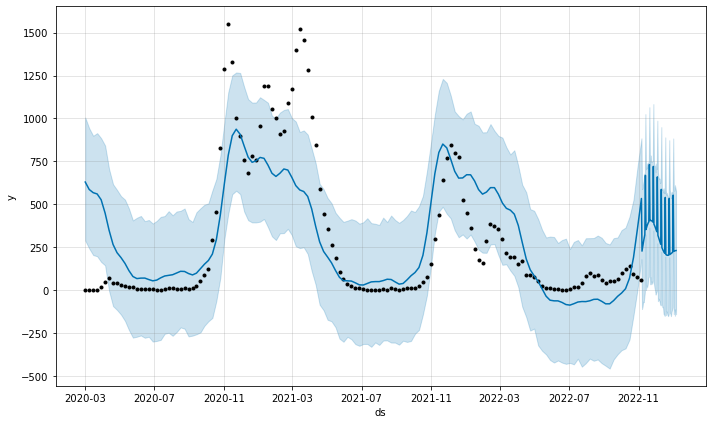

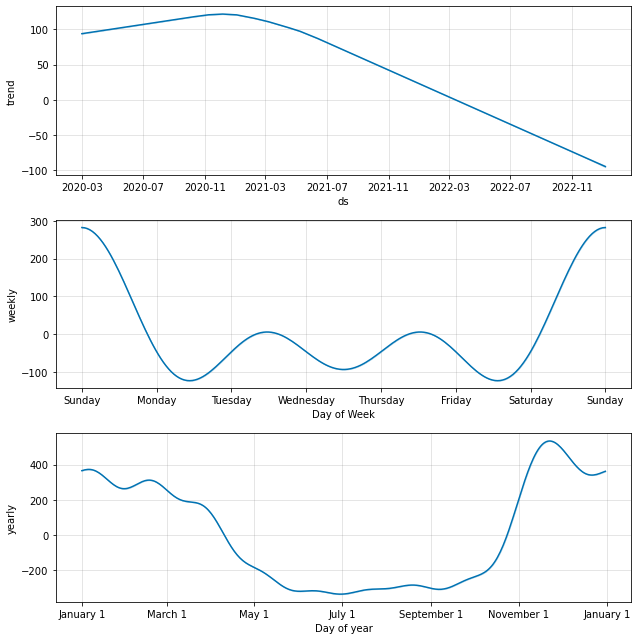

In [40]:
model_season = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model_season.fit(czechia_train)
future_season = model_season.make_future_dataframe(periods=61)
forecast_season = model_season.predict(future_season)
model_season.plot(forecast_season); 

model_season.plot_components(forecast_season);

In [41]:
performance_season = pd.merge(czechia_test, forecast_season[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-61:], on='ds')
mae = mean_absolute_error(performance_season['y'], performance_season['yhat'])
mape = mean_absolute_percentage_error(performance_season['y'], performance_season['yhat'])
r2 = r2_score(performance_season['y'], performance_season['yhat'])
new_row = {'country': 'Czechia', 'model': 'Seasonal Prophet', 'mae': mae, 'mape': mape, 'rsq': r2}
metrics = metrics.append(new_row, ignore_index=True)

# Estonia

## train/test split

In [42]:
estonia = pd.read_csv('univariate_df_Estonia.csv')
estonia['date'] = pd.to_datetime(estonia['date'])
estonia = estonia.drop('Unnamed: 0', axis=1)
estonia = estonia.rename(columns={'date': 'ds', 'new_deaths': 'y'})
train_size = int(len(estonia) * 0.7)
estonia_train, estonia_test = estonia[0:train_size], estonia[train_size:]
print(estonia_train.shape, estonia_test.shape)

(141, 3) (61, 3)


## Baseline Prophet

17:25:54 - cmdstanpy - INFO - Chain [1] start processing
17:25:54 - cmdstanpy - INFO - Chain [1] done processing


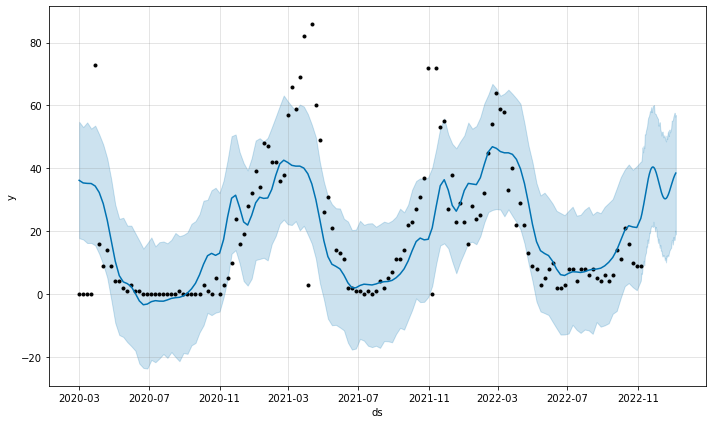

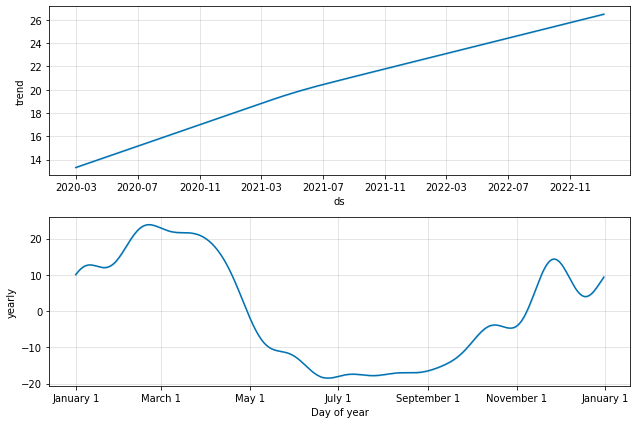

In [43]:
model_baseline = Prophet()
model_baseline.fit(estonia_train)
future_baseline = model_baseline.make_future_dataframe(periods=61)
forecast_baseline = model_baseline.predict(future_baseline)
model_baseline.plot(forecast_baseline); 
model_baseline.plot_components(forecast_baseline);

In [44]:
performance_baseline = pd.merge(estonia_test, forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-61:], on='ds')
mae = mean_absolute_error(performance_baseline['y'], performance_baseline['yhat'])
mape = mean_absolute_percentage_error(performance_baseline['y'], performance_baseline['yhat'])
r2 = r2_score(performance_baseline['y'], performance_baseline['yhat'])
new_row = {'country': 'Estonia', 'model': 'Baseline Prophet', 'mae': mae, 'mape': mape, 'rsq': r2}
metrics = metrics.append(new_row, ignore_index=True)

## Seasonal Prophet

17:25:57 - cmdstanpy - INFO - Chain [1] start processing
17:25:57 - cmdstanpy - INFO - Chain [1] done processing


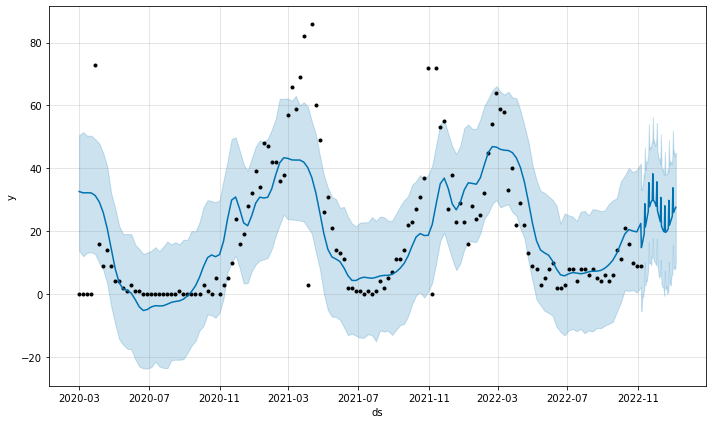

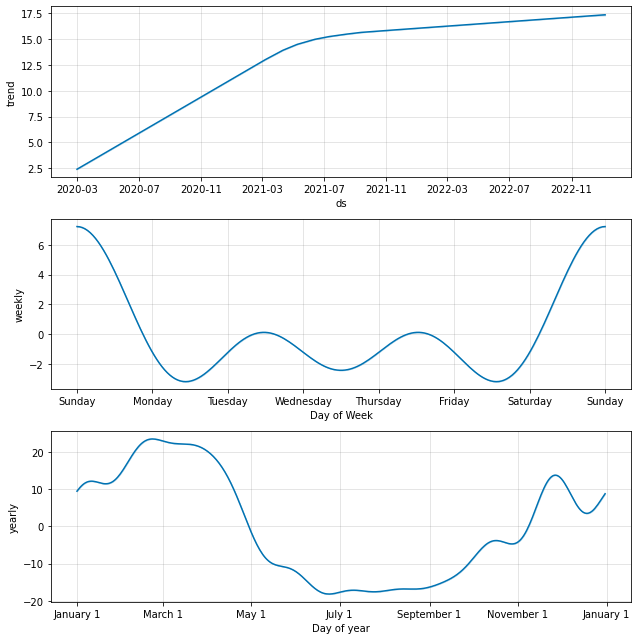

In [45]:
model_season = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model_season.fit(estonia_train)
future_season = model_season.make_future_dataframe(periods=61)
forecast_season = model_season.predict(future_season)
model_season.plot(forecast_season); 

model_season.plot_components(forecast_season);

In [46]:
performance_season = pd.merge(estonia_test, forecast_season[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-61:], on='ds')
mae = mean_absolute_error(performance_season['y'], performance_season['yhat'])
mape = mean_absolute_percentage_error(performance_season['y'], performance_season['yhat'])
r2 = r2_score(performance_season['y'], performance_season['yhat'])
new_row = {'country': 'Estonia', 'model': 'Seasonal Prophet', 'mae': mae, 'mape': mape, 'rsq': r2}
metrics = metrics.append(new_row, ignore_index=True)

# France

## train/test split

In [47]:
france = pd.read_csv('univariate_df_France.csv')
france['date'] = pd.to_datetime(france['date'])
france = france.drop('Unnamed: 0', axis=1)
france = france.rename(columns={'date': 'ds', 'new_deaths': 'y'})
train_size = int(len(france) * 0.7)
france_train, france_test = france[0:train_size], france[train_size:]
print(france_train.shape, france_test.shape)

(141, 3) (61, 3)


## Baseline Prophet

17:26:01 - cmdstanpy - INFO - Chain [1] start processing
17:26:01 - cmdstanpy - INFO - Chain [1] done processing


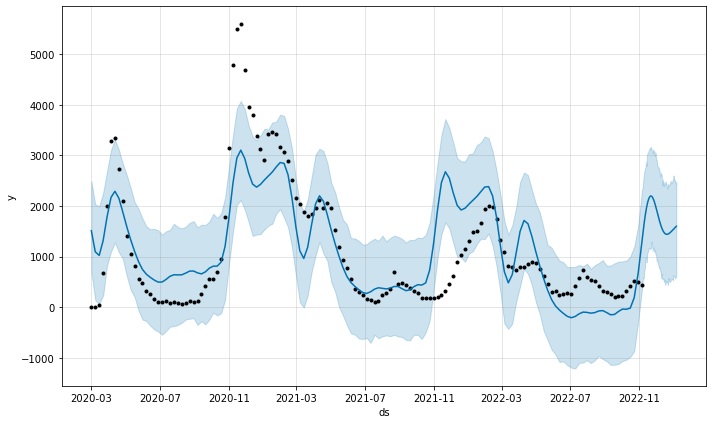

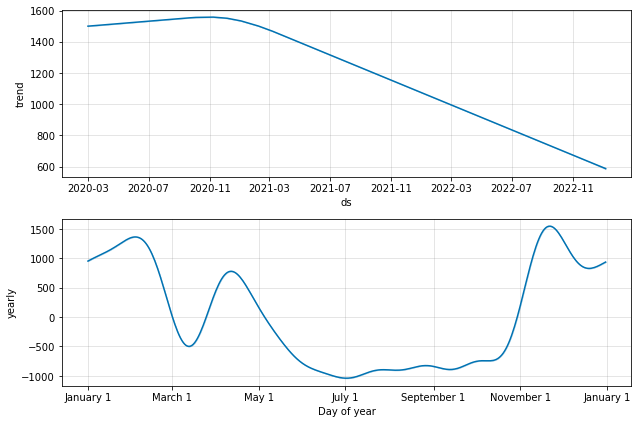

In [48]:
model_baseline = Prophet()
model_baseline.fit(france_train)
future_baseline = model_baseline.make_future_dataframe(periods=61)
forecast_baseline = model_baseline.predict(future_baseline)
model_baseline.plot(forecast_baseline); 
model_baseline.plot_components(forecast_baseline);

In [49]:
performance_baseline = pd.merge(france_test, forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-61:], on='ds')
mae = mean_absolute_error(performance_baseline['y'], performance_baseline['yhat'])
mape = mean_absolute_percentage_error(performance_baseline['y'], performance_baseline['yhat'])
r2 = r2_score(performance_baseline['y'], performance_baseline['yhat'])
new_row = {'country': 'France', 'model': 'Baseline Prophet', 'mae': mae, 'mape': mape, 'rsq': r2}
metrics = metrics.append(new_row, ignore_index=True)

## Seasonal Prophet

17:26:03 - cmdstanpy - INFO - Chain [1] start processing
17:26:03 - cmdstanpy - INFO - Chain [1] done processing


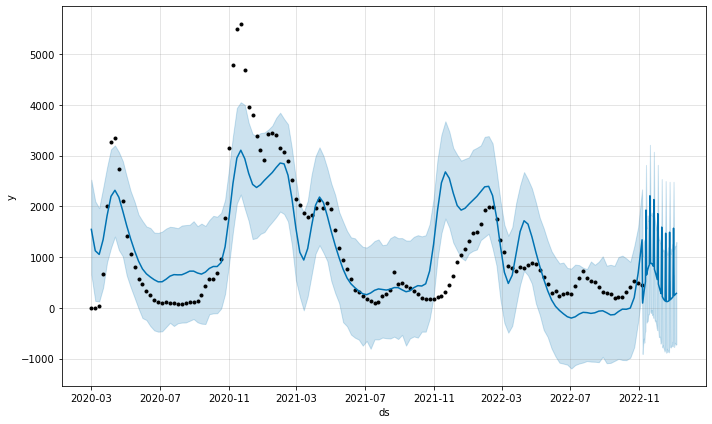

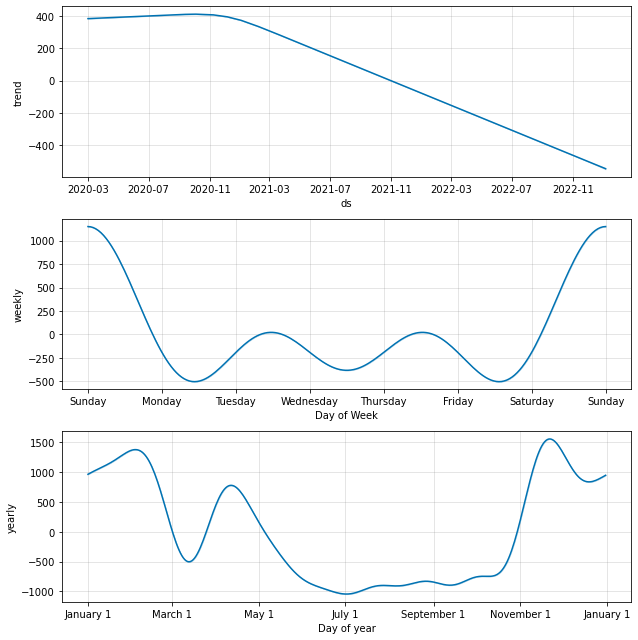

In [50]:
model_season = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model_season.fit(france_train)
future_season = model_season.make_future_dataframe(periods=61)
forecast_season = model_season.predict(future_season)
model_season.plot(forecast_season); 

model_season.plot_components(forecast_season);

In [51]:
performance_season = pd.merge(france_test, forecast_season[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-61:], on='ds')
mae = mean_absolute_error(performance_season['y'], performance_season['yhat'])
mape = mean_absolute_percentage_error(performance_season['y'], performance_season['yhat'])
r2 = r2_score(performance_season['y'], performance_season['yhat'])
new_row = {'country': 'France', 'model': 'Seasonal Prophet', 'mae': mae, 'mape': mape, 'rsq': r2}
metrics = metrics.append(new_row, ignore_index=True)

# Malaysia

## train/test split

In [52]:
malaysia = pd.read_csv('univariate_df_Malaysia.csv')
malaysia['date'] = pd.to_datetime(malaysia['date'])
malaysia = malaysia.drop('Unnamed: 0', axis=1)
malaysia = malaysia.rename(columns={'date': 'ds', 'new_deaths': 'y'})
train_size = int(len(malaysia) * 0.7)
malaysia_train, malaysia_test = malaysia[0:train_size], malaysia[train_size:]
print(malaysia_train.shape, malaysia_test.shape)

(141, 3) (61, 3)


## Baseline Prophet

17:26:06 - cmdstanpy - INFO - Chain [1] start processing
17:26:07 - cmdstanpy - INFO - Chain [1] done processing


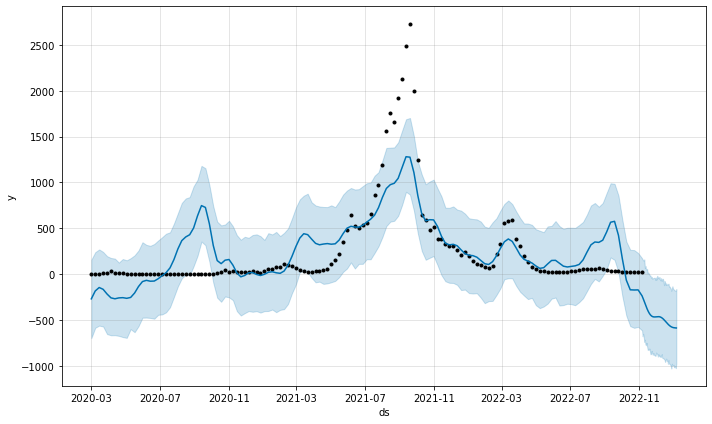

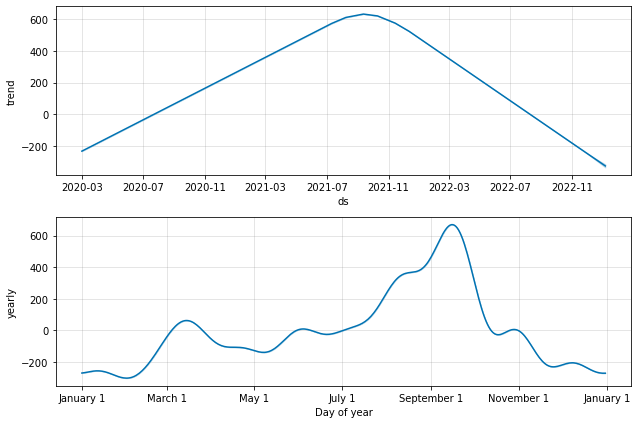

In [53]:
model_baseline = Prophet()
model_baseline.fit(malaysia_train)
future_baseline = model_baseline.make_future_dataframe(periods=61)
forecast_baseline = model_baseline.predict(future_baseline)
model_baseline.plot(forecast_baseline); 
model_baseline.plot_components(forecast_baseline);

In [54]:
performance_baseline = pd.merge(malaysia_test, forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-61:], on='ds')
mae = mean_absolute_error(performance_baseline['y'], performance_baseline['yhat'])
mape = mean_absolute_percentage_error(performance_baseline['y'], performance_baseline['yhat'])
r2 = r2_score(performance_baseline['y'], performance_baseline['yhat'])
new_row = {'country': 'Malaysia', 'model': 'Baseline Prophet', 'mae': mae, 'mape': mape, 'rsq': r2}
metrics = metrics.append(new_row, ignore_index=True)

## Seasonal Prophet

17:26:09 - cmdstanpy - INFO - Chain [1] start processing
17:26:10 - cmdstanpy - INFO - Chain [1] done processing


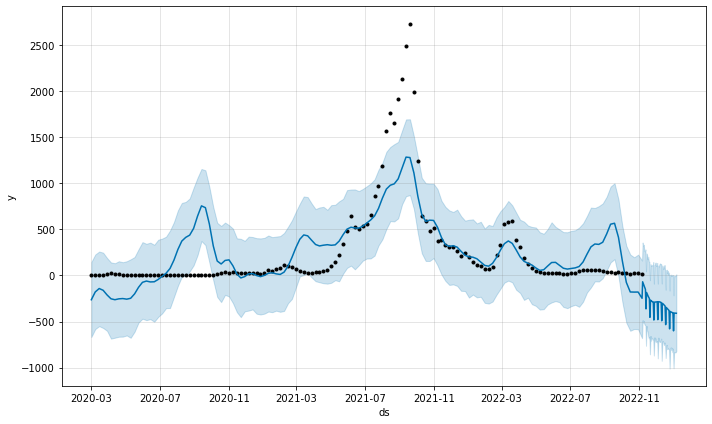

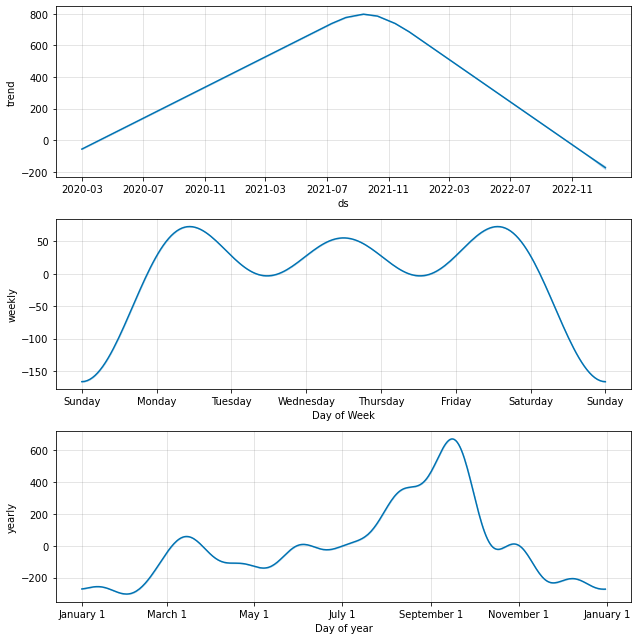

In [55]:
model_season = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model_season.fit(malaysia_train)
future_season = model_season.make_future_dataframe(periods=61)
forecast_season = model_season.predict(future_season)
model_season.plot(forecast_season); 

model_season.plot_components(forecast_season);

In [56]:
performance_season = pd.merge(malaysia_test, forecast_season[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-61:], on='ds')
mae = mean_absolute_error(performance_season['y'], performance_season['yhat'])
mape = mean_absolute_percentage_error(performance_season['y'], performance_season['yhat'])
r2 = r2_score(performance_season['y'], performance_season['yhat'])
new_row = {'country': 'Malaysia', 'model': 'Seasonal Prophet', 'mae': mae, 'mape': mape, 'rsq': r2}
metrics = metrics.append(new_row, ignore_index=True)

# Multivariate Prophet

In [74]:
multivar = pd.read_csv('multivar.csv')
multivar['date'] = pd.to_datetime(multivar['date'])
multivar = multivar.drop('Unnamed: 0', axis=1)
multivar = multivar.rename(columns={'date': 'ds', 'new_deaths': 'y'})

In [75]:
# checking for NAs
print(multivar['new_deaths_2_week_mean'].isna().sum())
val = multivar[multivar['new_deaths_2_week_mean'].isna()]
print(val[['ds', 'location']])

print(multivar['new_deaths_2_week_max'].isna().sum())
val = multivar[multivar['new_deaths_2_week_max'].isna()]
print(val[['ds', 'location']])

print(multivar['new_deaths_2_week_min'].isna().sum())
val = multivar[multivar['new_deaths_2_week_min'].isna()]
print(val[['ds', 'location']])

print(multivar['new_deaths_1_week_lag'].isna().sum())
val = multivar[multivar['new_deaths_1_week_lag'].isna()]
print(val[['ds', 'location']])

print(multivar['new_deaths_4_week_mean'].isna().sum())
val = multivar[multivar['new_deaths_4_week_mean'].isna()]
print(val[['ds', 'location']])

1
          ds location
0 2020-03-01  Belgium
1
          ds location
0 2020-03-01  Belgium
1
          ds location
0 2020-03-01  Belgium
1
          ds location
0 2020-03-01  Belgium
3
          ds location
0 2020-03-01  Belgium
1 2020-03-08  Belgium
2 2020-03-15  Belgium


In [76]:
# checking for NAs
print(multivar['new_deaths_4_week_max'].isna().sum())
val = multivar[multivar['new_deaths_4_week_max'].isna()]
print(val[['ds', 'location']])

print(multivar['new_deaths_4_week_min'].isna().sum())
val = multivar[multivar['new_deaths_4_week_min'].isna()]
print(val[['ds', 'location']])

print(multivar['new_deaths_2_week_lag'].isna().sum())
val = multivar[multivar['new_deaths_2_week_lag'].isna()]
print(val[['ds', 'location']])

print(multivar['new_deaths_4_week_lag'].isna().sum())
val = multivar[multivar['new_deaths_4_week_lag'].isna()]
print(val[['ds', 'location']])

print(multivar['new_deaths_4_week_std'].isna().sum())
val = multivar[multivar['new_deaths_4_week_std'].isna()]
print(val[['ds', 'location']])

3
          ds location
0 2020-03-01  Belgium
1 2020-03-08  Belgium
2 2020-03-15  Belgium
3
          ds location
0 2020-03-01  Belgium
1 2020-03-08  Belgium
2 2020-03-15  Belgium
2
          ds location
0 2020-03-01  Belgium
1 2020-03-08  Belgium
4
          ds location
0 2020-03-01  Belgium
1 2020-03-08  Belgium
2 2020-03-15  Belgium
3 2020-03-22  Belgium
3
          ds location
0 2020-03-01  Belgium
1 2020-03-08  Belgium
2 2020-03-15  Belgium


In [84]:
# removing NA rows
rows_to_remove = [
    ('2020-03-01', 'Belgium'),
    ('2020-03-08', 'Belgium'),
    ('2020-03-15', 'Belgium'),
    ('2020-03-22', 'Belgium')
]
multivar = multivar[~((multivar['ds'].isin([v[0] for v in rows_to_remove])) & (multivar['location'].isin([v[1] for v in rows_to_remove])))]

In [86]:
train_size = int(len(multivar) * 0.7)
multivar_train, multivar_test = multivar[0:train_size], multivar[train_size:]
print(multivar_train.shape, multivar_test.shape)

(1413, 53) (606, 53)


In [87]:
model_multivariate = Prophet(yearly_seasonality=True, weekly_seasonality=True)

model_multivariate.add_regressor('new_deaths_2_week_mean', standardize=False)
model_multivariate.add_regressor('new_deaths_2_week_max', standardize=False)
model_multivariate.add_regressor('new_deaths_2_week_min', standardize=False)
model_multivariate.add_regressor('new_deaths_1_week_lag', standardize=False)
model_multivariate.add_regressor('new_deaths_4_week_mean', standardize=False)
model_multivariate.add_regressor('new_deaths_4_week_max', standardize=False)
model_multivariate.add_regressor('new_deaths_4_week_min', standardize=False)
model_multivariate.add_regressor('new_deaths_2_week_lag', standardize=False)
model_multivariate.add_regressor('new_deaths_4_week_lag', standardize=False)
model_multivariate.add_regressor('new_deaths_4_week_std', standardize=False)

model_multivariate.fit(multivar_train)

17:54:42 - cmdstanpy - INFO - Chain [1] start processing
17:54:46 - cmdstanpy - INFO - Chain [1] done processing


In [88]:
future_multivariate = model_multivariate.make_future_dataframe(periods=606)
future_multivariate = pd.merge(future_multivariate, multivar[['ds',
                                                              'new_deaths_2_week_mean',
                                                              'new_deaths_2_week_max',
                                                              'new_deaths_2_week_min',
                                                              'new_deaths_1_week_lag',
                                                              'new_deaths_4_week_mean',
                                                              'new_deaths_4_week_max',
                                                              'new_deaths_4_week_min',
                                                              'new_deaths_2_week_lag',
                                                              'new_deaths_4_week_lag',
                                                              'new_deaths_4_week_std']], on='ds', how='inner')

future_multivariate = future_multivariate.fillna(method='ffill')
future_multivariate.tail(10)

,ds,new_deaths_2_week_mean,new_deaths_2_week_max,new_deaths_2_week_min,new_deaths_1_week_lag,new_deaths_4_week_mean,new_deaths_4_week_max,new_deaths_4_week_min,new_deaths_2_week_lag,new_deaths_4_week_lag,new_deaths_4_week_std
2009,2024-01-07,0.0,0.0,0.0,0.0,3.75,15.0,0.0,0.0,15.0,7.500000
2010,2024-01-07,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000020
2011,2024-01-07,0.5,1.0,0.0,1.0,2.50,5.0,0.0,5.0,5.0,2.380476
2012,2024-01-07,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000020
2013,2024-01-07,8.0,16.0,0.0,16.0,158.00,388.0,0.0,228.0,382.0,185.227788
2014,2024-01-07,12.5,25.0,0.0,25.0,18.75,28.0,0.0,22.0,11.0,12.737739
2015,2024-01-07,419.5,839.0,0.0,839.0,888.00,1450.0,0.0,1263.0,1614.0,644.829176
2016,2024-01-14,0.0,0.0,0.0,0.0,24.50,63.0,0.0,35.0,72.0,30.512293
2017,2024-01-14,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,15.0,0.000004
2018,2024-01-14,0.5,1.0,0.0,0.0,12.00,25.0,0.0,25.0,28.0,13.341664


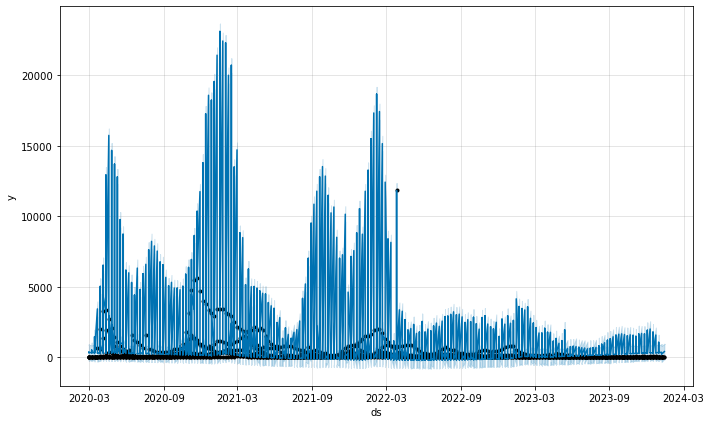

In [89]:
forecast_multivariate = model_multivariate.predict(future_multivariate)

model_multivariate.plot(forecast_multivariate); 

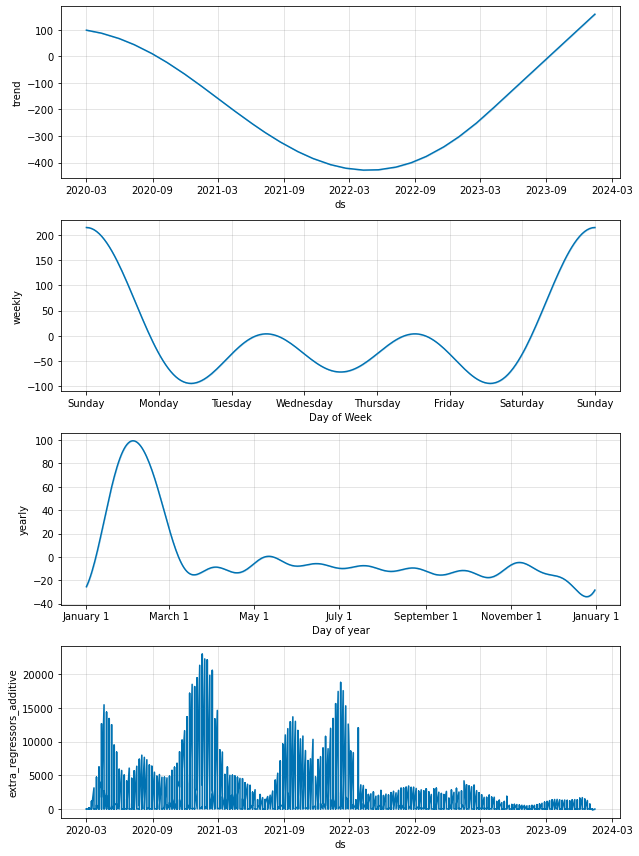

In [90]:
model_multivariate.plot_components(forecast_multivariate);

In [91]:
performance_multivariate = pd.merge(multivar_test, forecast_multivariate[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-606:], on='ds')
mae = mean_absolute_error(performance_multivariate['y'], performance_multivariate['yhat'])
mape = mean_absolute_percentage_error(performance_multivariate['y'], performance_multivariate['yhat'])
r2 = r2_score(performance_season['y'], performance_season['yhat'])
new_row = {'country': 'All', 'model': 'Multivariate', 'mae': mae, 'mape': mape, 'rsq': r2}
metrics = metrics.append(new_row, ignore_index=True)

# Multivariate Prophet (Event + Holiday)

In [93]:
# COVID time window
events = pd.DataFrame({
    'holiday': 'COVID',
    'ds': pd.to_datetime(['2020-03-15']),
    'lower_window': -15,
    'upper_window': 15,
})

In [96]:
model_holiday = Prophet(yearly_seasonality=True, weekly_seasonality=True, holidays=events)

model_holiday.add_country_holidays(country_name='Belgium')
model_holiday.add_country_holidays(country_name='Chile')
model_holiday.add_country_holidays(country_name='Ireland')
model_holiday.add_country_holidays(country_name='Israel')
model_holiday.add_country_holidays(country_name='Italy')
model_holiday.add_country_holidays(country_name='US')
model_holiday.add_country_holidays(country_name='Czechia')
model_holiday.add_country_holidays(country_name='Estonia')
model_holiday.add_country_holidays(country_name='France')
model_holiday.add_country_holidays(country_name='Malaysia')

model_holiday.add_regressor('new_deaths_2_week_mean', standardize=False)
model_holiday.add_regressor('new_deaths_2_week_max', standardize=False)
model_holiday.add_regressor('new_deaths_2_week_min', standardize=False)
model_holiday.add_regressor('new_deaths_1_week_lag', standardize=False)
model_holiday.add_regressor('new_deaths_4_week_mean', standardize=False)
model_holiday.add_regressor('new_deaths_4_week_max', standardize=False)
model_holiday.add_regressor('new_deaths_4_week_min', standardize=False)
model_holiday.add_regressor('new_deaths_2_week_lag', standardize=False)
model_holiday.add_regressor('new_deaths_4_week_lag', standardize=False)
model_holiday.add_regressor('new_deaths_4_week_std', standardize=False)

model_holiday.fit(multivar_train)

Changing country holidays from 'Belgium' to 'Chile'.
Changing country holidays from 'Chile' to 'Ireland'.
Changing country holidays from 'Ireland' to 'Israel'.
Changing country holidays from 'Israel' to 'Italy'.
Changing country holidays from 'Italy' to 'US'.
Changing country holidays from 'US' to 'Czechia'.
Changing country holidays from 'Czechia' to 'Estonia'.
Changing country holidays from 'Estonia' to 'France'.
Changing country holidays from 'France' to 'Malaysia'.
18:10:04 - cmdstanpy - INFO - Chain [1] start processing
18:10:09 - cmdstanpy - INFO - Chain [1] done processing


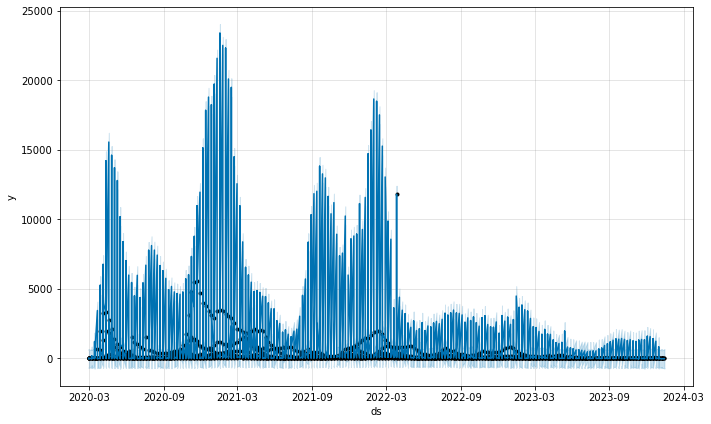

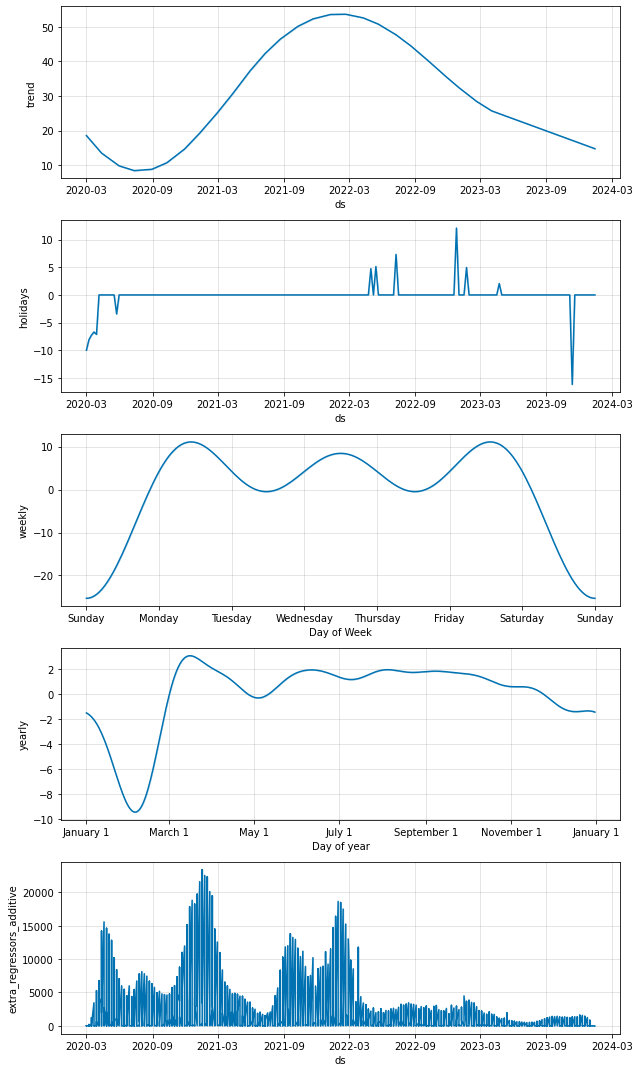

In [98]:
future_holiday = model_holiday.make_future_dataframe(periods=606)

future_holiday = pd.merge(future_holiday, multivar[['ds',
                                                              'new_deaths_2_week_mean',
                                                              'new_deaths_2_week_max',
                                                              'new_deaths_2_week_min',
                                                              'new_deaths_1_week_lag',
                                                              'new_deaths_4_week_mean',
                                                              'new_deaths_4_week_max',
                                                              'new_deaths_4_week_min',
                                                              'new_deaths_2_week_lag',
                                                              'new_deaths_4_week_lag',
                                                              'new_deaths_4_week_std']], on='ds', how='inner')

future_holiday = future_holiday.fillna(method='ffill')
forecast_holiday = model_holiday.predict(future_holiday)
model_holiday.plot(forecast_holiday); 
model_holiday.plot_components(forecast_holiday);

In [99]:
performance_holiday = pd.merge(multivar_test, forecast_holiday[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-16:], on='ds')
mae = mean_absolute_error(performance_holiday['y'], performance_holiday['yhat'])
mape = mean_absolute_percentage_error(performance_holiday['y'], performance_holiday['yhat'])
r2 = r2_score(performance_holiday['y'], performance_holiday['yhat'])
new_row = {'country': 'All', 'model': 'Multivariate Holiday', 'mae': mae, 'mape': mape, 'rsq': r2}
metrics = metrics.append(new_row, ignore_index=True)

# Metrics

In [101]:
metrics.sort_values('mape')

,country,model,mae,mape,rsq
4,Ireland,Baseline Prophet,9.897379,0.183065,-0.918408
5,Ireland,Seasonal Prophet,9.797087,0.191228,-0.669052
7,Israel,Seasonal Prophet,20.110051,0.578265,-4.747066
6,Israel,Baseline Prophet,20.694243,0.592989,-5.139804
3,Chile,Seasonal Prophet,125.662982,0.735293,-74.325226
2,Chile,Baseline Prophet,134.413846,0.786399,-82.327945
15,Estonia,Seasonal Prophet,18.044483,1.607256,-15.348355
14,Estonia,Baseline Prophet,20.240433,1.776364,-18.867958
9,Italy,Seasonal Prophet,1195.545144,1.853268,-143.882475
8,Italy,Baseline Prophet,1202.112601,1.863347,-145.378389
